## SFM Pareto Tail

This script is designed to model the left tail of the log-returns distribution of stock prices using Pareto and Normal distributions, highlighting a method to analyze financial time series data. It integrates financial theories with statistical analysis and programming to provide insights into risk and return dynamics.
Here's an overview of the process and tools involved:

### Key Components and Libraries
- **Pandas**: Utilized for data manipulation and analysis, especially suited for handling time series data from financial markets.
- **NumPy**: A library for numerical computing, essential for handling arrays and performing mathematical operations.
- **Matplotlib**: Enables the plotting of data, facilitating the visualization of stock price trends and other financial information.
- **SciPy**: Offers a collection of mathematical algorithms and convenience functions, including those for statistical analysis of data using specific distributions such as Pareto and Normal.
- **yfinance**: An open-source tool that provides a simple method to download historical market data from Yahoo Finance, allowing access to financial information for analysis.

### Procedure
1. **Ticker Symbol Definition**: The program begins by specifying a ticker symbol ('MSFT' for Microsoft Corporation), which identifies the stock to be analyzed.
   
2. **Historical Data Retrieval**: It then retrieves historical closing prices for the specified ticker over a given period, using `yfinance`. The script sets the timeframe from January 1, 2016, to March 1, 2024, for this purpose.

3. **Visualization of Closing Prices**: The initial step in the analysis involves plotting the historical closing prices. This visualization helps in understanding the general trend and volatility of the stock price over the chosen period.

### Educational Aims
- **Data Handling**: The process introduces methods for managing and visualizing time series data, a valuable skill in various analytical contexts.
- **Statistical Analysis**: The script lays the groundwork for subsequent detailed analysis, such as calculating log-returns and fitting theoretical distributions to the data. This approach aids in understanding financial risk from a statistical viewpoint.
- **Programming Proficiency**: Engaging with real-world data and applying theoretical frameworks enhances programming skills in Python, beneficial in a wide range of professional settings.

### Further Analysis
After this preliminary step, the analysis typically advances to more detailed statistical examinations, including calculating log-returns and fitting distributions to understand aspects like volatility and tail risk. This comprehensive approach offers insights into financial risk assessment, combining practical data analysis with theoretical financial concepts.

In [ ]:
'''
This program models the left tail of the log-returns distribution using Pareto 
and Normal distribution.
'''
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import norm
# We will look at stock prices overtime
import yfinance as yf


#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2016-1-1', end='2024-3-1')

data=df['Close']

data.plot(figsize=(10, 6), legend = False, title='Closing Price');




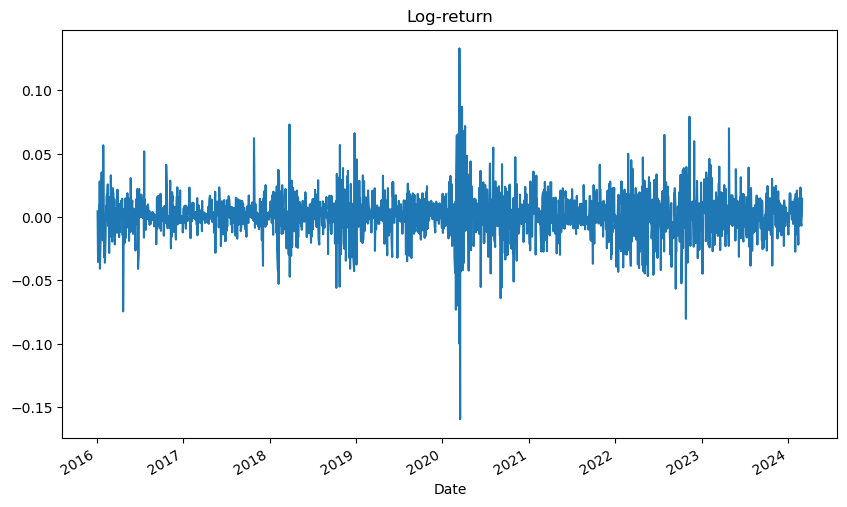

In [2]:
log_returns = np.log(1 + data.pct_change())
log_returns.plot(figsize=(10, 6),legend = False, title='Log-return');


The script is formulated to analyze financial log-return data, emphasizing extreme negative returns for market risk insights. It leverages the `powerlaw` library to assess distributions typically observed in financial datasets, focusing on those with heavy tails. Essential processes include data cleaning, extreme value isolation, and log-return distribution visualization.

Key components and their corresponding LaTeX representations are:

1. **Data Cleaning**:
   - Ensures the dataset's integrity by removing missing values.
   
2. **Statistical Measures**:
   - **1st Percentile (Quantile)** for isolating extreme negative returns:
    $$ q = \text{{log\_returns.quantile}}(0.01) $$
   - **Mean** for central tendency:
      $$  \mu = \text{{log\_returns.mean()}}  $$ 
   - **Standard Deviation** for dispersion:
     $$  \sigma = \text{{log\_returns.std()}}  $$ 

3. **Extreme Value Analysis**:
   - Focus on returns less than or equal to the 1st percentile and their absolute values for magnitude analysis:
     $$  y = |x|, \text{ where } x \text{ are log-returns} \leq q  $$ 

4. **Visualization**:
   - A histogram to visualize the distribution of log-returns and identify distribution characteristics.

This approach prepares the data for in-depth statistical evaluation, aiming to understand extreme market behaviors by comparing observed data with theoretical distributions.

In [ ]:
!pip install powerlaw
import powerlaw
data.dropna()


q=log_returns.quantile(0.01)
mu=log_returns.mean(axis=0)
sigma=log_returns.std(axis=0)
print(mu)
print(sigma)
print(q)


x=log_returns[log_returns<=q].dropna()
y=x.abs()

fig=log_returns.hist(figsize=(10, 6))

plt.show(block=False)

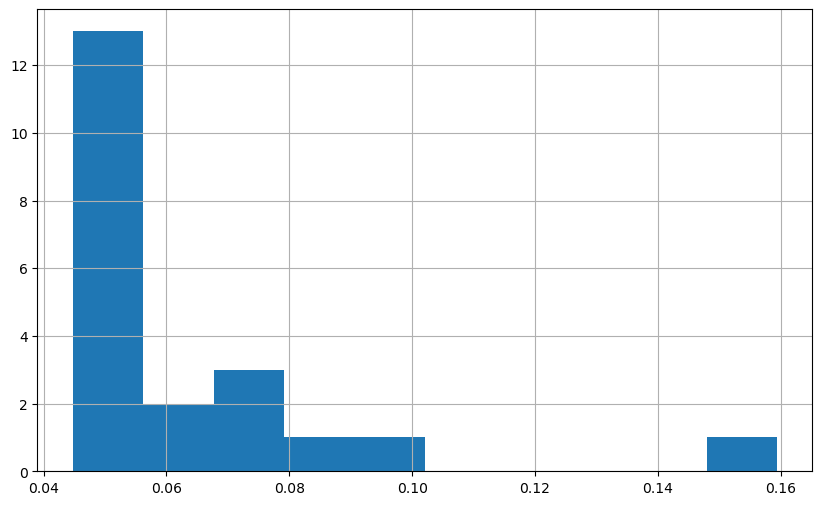

In [4]:
fig=y.hist(figsize=(10, 6))

plt.show(block=False)

To analyze the left tail of log-returns in financial data using a power law distribution, we estimate the scale parameter $x_{min}$ and the shape parameter $\alpha\$ of the Pareto distribution. These parameters are crucial for describing the behavior of the distribution's tail.

1. **Probability Density Function (PDF) of the Pareto Distribution**: The PDF is defined as
$$
f(x;\alpha,x_{min}) = \frac{\alpha \cdot x_{min}^{\alpha}}{x^{\alpha+1}}, \quad \text{for } x \geq x_{min}
$$
where $ x_{min} $ is the scale parameter that indicates the minimum value from which the power law behavior is observed, and $\alpha$ is the shape parameter that determines the heaviness of the tail.

2. **Estimation Process**: The fitting process includes estimating $x_{min}$ and $\alpha\$ to optimize the alignment between the empirical data's tail and the theoretical Pareto distribution. This is achieved through methods like maximum likelihood estimation (MLE) and goodness-of-fit tests.

3. **Parameters**:
   - **Scale Parameter $x_{min}$ **: Identifies the threshold above which the data exhibit a Pareto distribution behavior.
   - **Shape Parameter $\alpha$ **: Indicates the tail's heaviness. A lower $\alpha\$  value signifies a heavier tail, which corresponds to a higher likelihood of observing extreme values.

After the fitting process, the script provides the estimated values of \(x_{min}\) and \(\alpha\), offering insights into the risk associated with extreme market movements. These parameters are essential for comprehensively understanding financial risk and developing appropriate risk management strategies.v

In [ ]:


y=np.array(y)


z=y.ravel()



fit = powerlaw.Fit(z)
alpha=fit.alpha
xmin=fit.xmin

print('Only the 1% lowest logreturns from the left tail are selected')
print('Parameters of the Pareto Distribution')
print('Estimated tail index alpha=%.3f' %alpha)
print('Estimated x_min=%.3f' %xmin)


Calculating best minimal value for power law fit


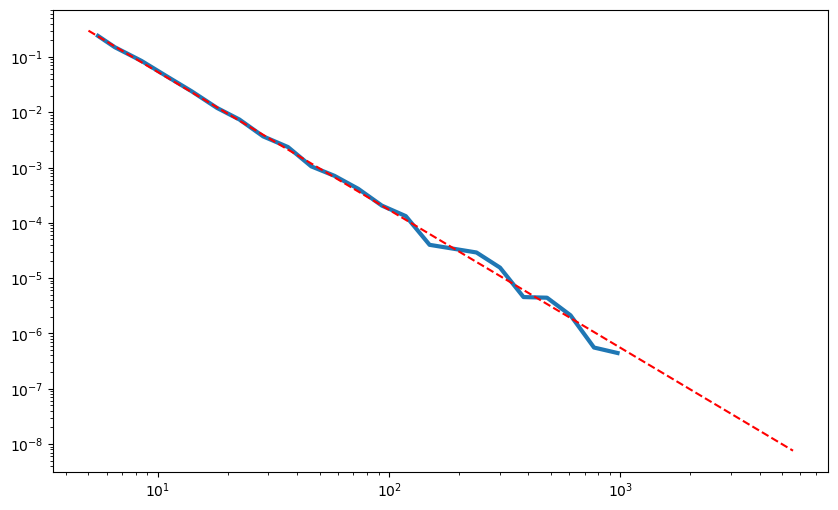

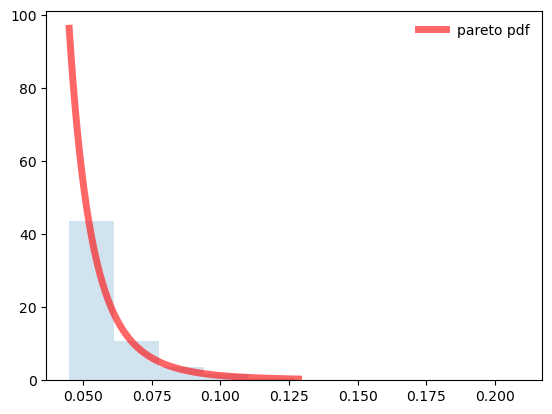

<Figure size 1000x600 with 0 Axes>

In [6]:
simulated_data = fit.power_law.generate_random(100)

theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])
simulated_data = theoretical_distribution.generate_random(10000)

theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])
simulated_data = theoretical_distribution.generate_random(10000)
####

plt.figure(figsize=(10,6))

fit = powerlaw.Fit(simulated_data)
fit.power_law.xmin, fit.power_law.alpha

powerlaw.plot_pdf(simulated_data,linewidth=3)
fit.power_law.plot_pdf(simulated_data,linestyle='--',color='r')
loc=0
#xmin*alpha/(alpha-1)

r = pareto.rvs(alpha, size=1000, loc=loc, scale=xmin)
fig, ax = plt.subplots(1, 1)

x = np.linspace(pareto.ppf(0.01, alpha, loc=loc, scale=xmin),
                pareto.ppf(0.99, alpha, loc=loc, scale=xmin), 1000)
ax.plot(x, pareto.pdf(x, alpha, loc=loc, scale=xmin),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.figure(figsize=(10,6))
plt.show()




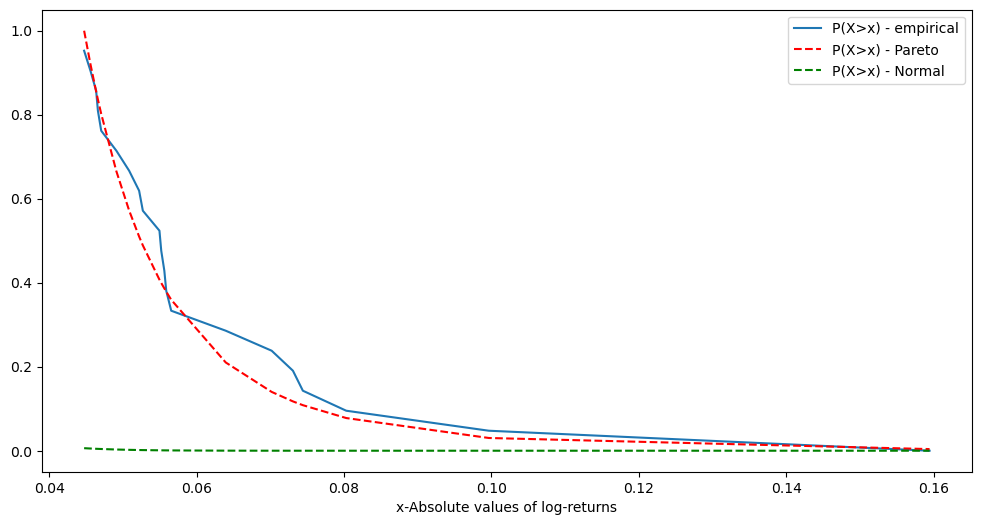

In [7]:

xs = np.sort(z)
ys = 1-np.arange(1, len(xs)+1)/float(len(xs))
zs=1-pareto.cdf(xs, alpha, loc=0, scale=xmin)
vs=1-norm.cdf(xs, mu, sigma)
plt.figure(figsize=(12,6))
plt.plot(xs, ys)
plt.plot(xs, zs, linestyle='--',color='r')
plt.plot(xs, vs, linestyle='--',color='g')
plt.legend(['P(X>x) - empirical', 'P(X>x) - Pareto', 'P(X>x) - Normal'])
#plt.axis([0.05, 0.15, 0, 0.4])
plt.xlabel('x-Absolute values of log-returns')
plt.show()

In [8]:
#Probability of a loss greater than x
x=0.1
prob=1-pareto.cdf(x, alpha, loc=0, scale=xmin)
prob

0.029851465549824985

In [9]:
# Recuring time years
n_days=252
1/(prob*n_days)

0.13293330478634519

In [10]:
# Normal probability
p_norm=1-norm.cdf(x, mu, sigma)
p_norm

6.493289794740065e-09

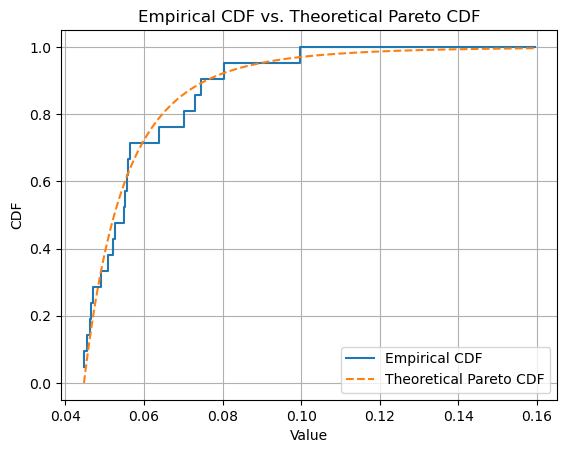

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Assuming `data` is your empirical dataset as a NumPy array
data = y # replace with your actual data


# Sort the data for empirical CDF
sorted_data = np.sort(data)
# Calculate the empirical CDF
yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)

# Plot the empirical CDF
plt.step(sorted_data, yvals, label='Empirical CDF')

# Generate values for the theoretical Pareto CDF
x_values = np.linspace(min(data), max(data), 1000)
pareto_cdf = 1 - (xmin / x_values) ** alpha

# Plot the theoretical Pareto CDF
plt.plot(x_values, pareto_cdf, label='Theoretical Pareto CDF', linestyle='--')

plt.title('Empirical CDF vs. Theoretical Pareto CDF')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


The Kolmogorov-Smirnov (K-S) test compares the empirical cumulative distribution function (CDF) of your dataset (`data`) against a theoretical CDF defined by the Pareto distribution. The specific parameters for the Pareto distribution, `alpha` and `xmin`, should be values that you've estimated or determined based on your data analysis.

### How the K-S Test Works
- The K-S test calculates the maximum difference (D statistic) between the empirical CDF of your sample data and the theoretical Pareto CDF across all possible values.
- The `p-value` associated with this statistic indicates the probability of observing such a difference if the sample truly comes from the specified Pareto distribution. A high p-value suggests that the difference between the observed and theoretical distributions could be due to random variation alone, indicating a good fit. Conversely, a low p-value suggests that the observed distribution significantly differs from the Pareto distribution, indicating a poor fit.

### Interpreting the Results
- **K-S Statistic (`ks_statistic`)**: This value represents the maximum deviation between the empirical and the theoretical Pareto CDFs. Smaller values indicate a closer fit between the two distributions.
- **P-Value (`p_value`)**: This value helps you decide whether to reject the null hypothesis that the two distributions are the same. Typically, a threshold (alpha level) of 0.05 is used, where:
  - If `p_value` < 0.05, you reject the null hypothesis, suggesting that the empirical data do not follow a Pareto distribution (considering your specified `alpha` and `xmin`).
  - If `p_value` >= 0.05, you fail to reject the null hypothesis, suggesting that the empirical data could reasonably come from a Pareto distribution.

### Important Considerations
- **Data Characteristics**: The K-S test is non-parametric and does not assume a specific distribution shape, making it versatile. However, it is more sensitive to differences in the central part of the distribution than in the tails.
- **Sample Size**: The power of the K-S test increases with sample size. For small samples, the test might not be able to detect significant differences between the empirical and theoretical distributions.

By interpreting the results of the K-S test in the context of your dataset and analysis goals, you can gain insights into how well the Pareto distribution fits your data. If the fit is poor, it may be necessary to consider alternative distributions or refine your model.

In [11]:
from scipy.stats import kstest, pareto
import numpy as np

# Assuming `data` is your empirical dataset as a NumPy array
data = y  # replace with your actual data


# Define the CDF for the Pareto distribution for comparison
def pareto_cdf(x):
    return 1 - (xmin / x) ** alpha

# Perform the K-S test
ks_statistic, p_value = kstest(data, pareto_cdf)

print(f"K-S statistic: {ks_statistic}, p-value: {p_value}")


K-S statistic: 0.1641986504749316, p-value: 0.5674751811313534
